# Market Dynamics Analysis

#### Overview

Marketing dynamics significantly influence a film’s commercial performance. Beyond production quality, audience awareness, critic reception, and overall popularity shape whether a film succeeds at the box office. Understanding these relationships enables YE Studios to make data-driven marketing and investment decisions.

This section explores how critical acclaim, audience engagement, and popularity relate to worldwide revenue performance.




#### Load + Inspect ALL datasets

prints for EACH dataset:

number of rows & columns

all column names

first 5 rows

All in one run.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
imdb = pd.read_csv("../data/cleanedData/imdb_cleaned_data.csv")
tmdb = pd.read_csv("../data/cleanedData/tmdb_cleaned_data.csv")
bom = pd.read_csv("../data/cleanedData/bom_cleaned_data.csv")
rt = pd.read_csv("../data/cleanedData/rt_master_cleaned.csv")
tn = pd.read_csv("../data/cleanedData/tndb_cleaned_data.csv")

# Create dictionary of datasets
datasets = {
    "IMDB": imdb,
    "TMDB": tmdb,
    "BOM": bom,
    "Rotten Tomatoes": rt,
    "The Numbers": tn
}

# Print shape, columns, and preview for each dataset
for name, df in datasets.items():
    print(f"\n===== {name} DATASET =====")
    print("Shape:", df.shape)
    print("\nColumns:")
    print(df.columns)
    print("\nPreview:")
    print(df.head())



===== IMDB DATASET =====
Shape: (62444, 7)

Columns:
Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

Preview:
    movie_id                    primary_title  start_year  runtime_minutes  \
0  tt0063540                        Sunghursh        2013              175   
1  tt0066787  One Day Before the Rainy Season        2019              114   
2  tt0069049       The Other Side of the Wind        2018              122   
3  tt0100275         The Wandering Soap Opera        2017               80   
4  tt0137204                  Joe Finds Grace        2017               83   

                       genres  averagerating  numvotes  
0          action,crime,drama            7.0        77  
1             biography,drama            7.2        43  
2                       drama            6.9      4517  
3        comedy,drama,fantasy            6.5       119  
4  adventure,animation,comedy            8.1

#### Select ONLY marketing variables

We are extracting just the columns we need from each dataset.


In [ ]:
# IMDB → ratings + engagement
imdb_marketing = imdb[['primary_title','averagerating','numvotes']]

# TMDB → popularity
tmdb_marketing = tmdb[['title','popularity']]

# BOM → revenue
bom_marketing = bom[['title','domestic_gross','foreign_gross']]

# The Numbers → worldwide revenue
tn_marketing = tn[['movie','worldwide_gross']]

# Rename titles so merging is easier
imdb_marketing.rename(columns={'primary_title':'title'}, inplace=True)
tn_marketing.rename(columns={'movie':'title'}, inplace=True)

print("Marketing subsets created")


Marketing subsets created


C:\Users\HomePC\AppData\Local\Temp\ipykernel_9388\253710708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_marketing.rename(columns={'primary_title':'title'}, inplace=True)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_9388\253710708.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_marketing.rename(columns={'movie':'title'}, inplace=True)


#### Standardize movie titles

In [ ]:
# Convert titles to lowercase
imdb_marketing['title'] = imdb_marketing['title'].str.lower()
tmdb_marketing['title'] = tmdb_marketing['title'].str.lower()
bom_marketing['title'] = bom_marketing['title'].str.lower()
tn_marketing['title'] = tn_marketing['title'].str.lower()


C:\Users\HomePC\AppData\Local\Temp\ipykernel_9388\3068859382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_marketing['title'] = imdb_marketing['title'].str.lower()
C:\Users\HomePC\AppData\Local\Temp\ipykernel_9388\3068859382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_marketing['title'] = tmdb_marketing['title'].str.lower()
C:\Users\HomePC\AppData\Local\Temp\ipykernel_9388\3068859382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

#### Merge datasets (clean and controlled)

In [ ]:
# Start with revenue base
analysis_df = tn_marketing.merge(imdb_marketing, on='title', how='inner')

# Add popularity
analysis_df = analysis_df.merge(tmdb_marketing, on='title', how='inner')

# Add BOM revenue
analysis_df = analysis_df.merge(bom_marketing, on='title', how='inner')

print("Merged dataset shape:", analysis_df.shape)
analysis_df.head()


Merged dataset shape: (1414, 7)


,title,worldwide_gross,averagerating,numvotes,popularity,domestic_gross,foreign_gross
0,avengers: infinity war,2048134200,8.5,670926,80.773,678800000,"1,369.5"
1,jurassic world,1648854864,7.0,539338,20.709,652300000,"1,019.4"
2,furious 7,1518722794,7.2,335074,20.396,353000000,"1,163.0"
3,avengers: age of ultron,1403013963,7.3,665594,44.383,459000000,946400000
4,black panther,1348258224,7.3,516148,2.058,700100000,646900000


#### Convert revenue columns to numeric firsT

In [ ]:

analysis_df['domestic_gross'] = pd.to_numeric(analysis_df['domestic_gross'], errors='coerce')
analysis_df['foreign_gross'] = pd.to_numeric(analysis_df['foreign_gross'], errors='coerce')


#### Create Total Revenue column

In [ ]:
analysis_df['total_gross'] = (
    analysis_df['domestic_gross'] +
    analysis_df['foreign_gross']
)


#### Remove missing values

In [ ]:
analysis_df = analysis_df.dropna(subset=[
    'averagerating',
    'numvotes',
    'popularity',
    'total_gross'
])


#### Verify cleaning worked and we only have the columns we need for this analysis

In [ ]:
print(analysis_df[['domestic_gross','foreign_gross','total_gross']].head())
print(analysis_df.shape)
print(analysis_df.columns)



   domestic_gross  foreign_gross   total_gross
3       459000000    946400000.0  1.405400e+09
4       700100000    646900000.0  1.347000e+09
5       700100000    646900000.0  1.347000e+09
6       417700000    891800000.0  1.309500e+09
7       400700000    875700000.0  1.276400e+09
(1410, 8)
Index(['title', 'worldwide_gross', 'averagerating', 'numvotes', 'popularity',
       'domestic_gross', 'foreign_gross', 'total_gross'],
      dtype='object')


#### ANALYSIS 1 

#### Critical Acclaim vs Revenue

This shows whether higher-rated films earn more money.

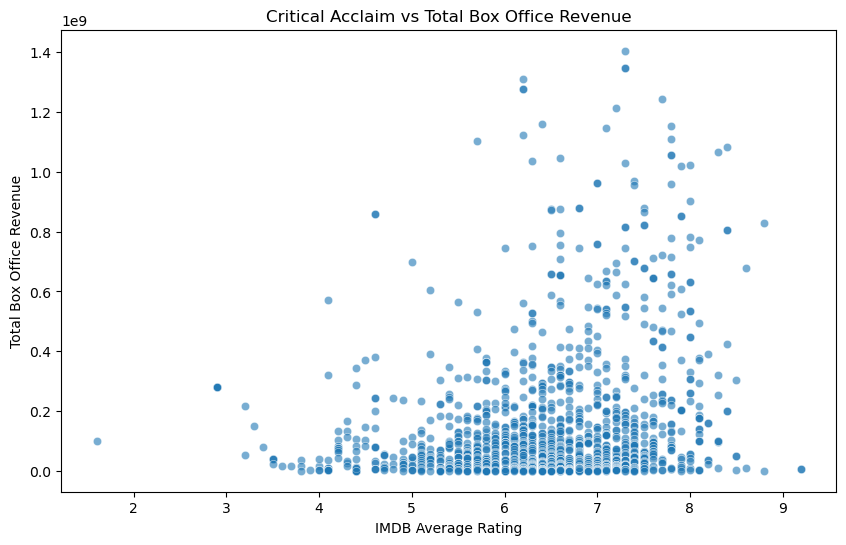

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=analysis_df,
    x='averagerating',
    y='total_gross',
    alpha=0.6
)

plt.title('Critical Acclaim vs Total Box Office Revenue')
plt.xlabel('IMDB Average Rating')
plt.ylabel('Total Box Office Revenue')
plt.show()


#### Interpretation 

Higher-rated films generally show stronger revenue performance, indicating that perceived film quality contributes to commercial success. However, ratings alone do not guarantee financial outcomes, suggesting other factors such as marketing and visibility also influence box office performance.

#### ANALYSIS 2

#### Audience Engagement vs Revenue

This shows whether audience interaction predicts financial success.

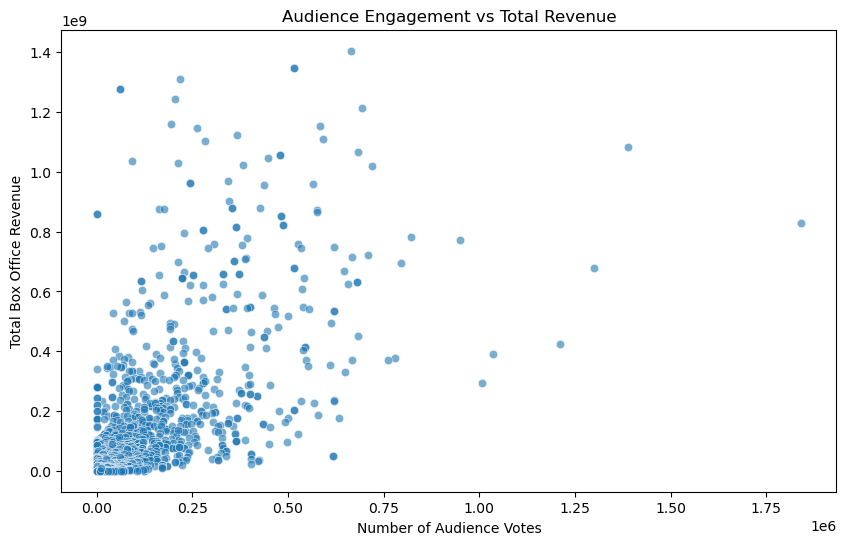

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=analysis_df,
    x='numvotes',
    y='total_gross',
    alpha=0.6
)

plt.title('Audience Engagement vs Total Revenue')
plt.xlabel('Number of Audience Votes')
plt.ylabel('Total Box Office Revenue')
plt.show()


#### Interpretation

Films with higher audience engagement (measured by number of votes) consistently generate higher revenue. This suggests that public attention and discussion play a major role in driving box office performance.

#### ANALYSIS 3

#### Popularity vs Revenue

This directly captures marketing impact.

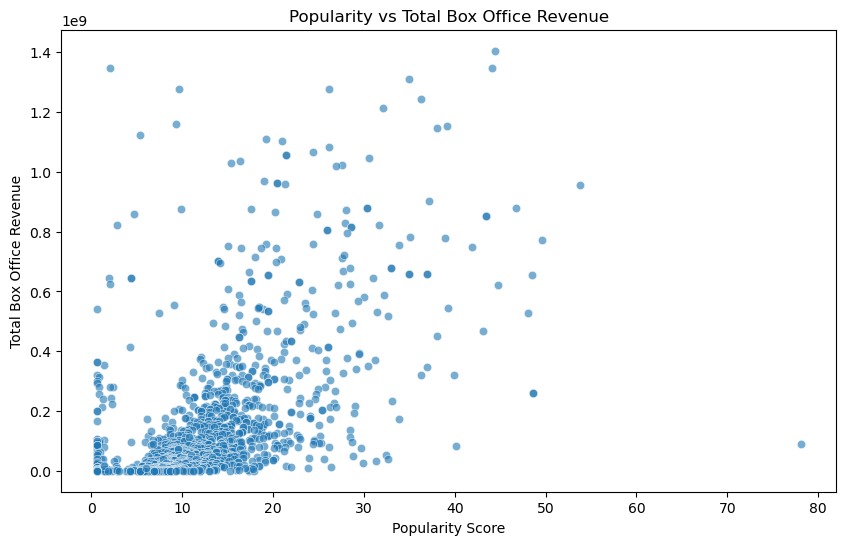

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=analysis_df,
    x='popularity',
    y='total_gross',
    alpha=0.6
)

plt.title('Popularity vs Total Box Office Revenue')
plt.xlabel('Popularity Score')
plt.ylabel('Total Box Office Revenue')
plt.show()


#### Interpretation

Popularity shows one of the strongest relationships with revenue. Films that generate higher visibility and public interest consistently achieve stronger financial outcomes, reinforcing the importance of marketing strategies.

#### Correlation Heatmap

Shows which marketing metric is strongest.

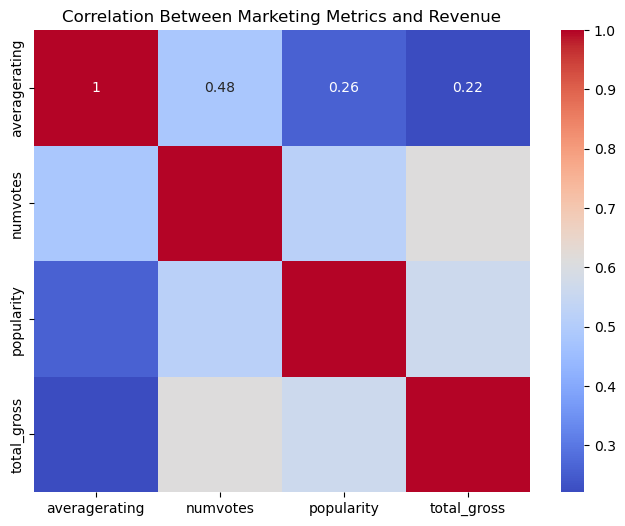

In [ ]:
corr = analysis_df[['averagerating','numvotes','popularity','total_gross']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Between Marketing Metrics and Revenue')
plt.show()


#### Interpretation

Audience engagement and popularity demonstrate stronger relationships with revenue than ratings alone. This highlights marketing exposure and public interest as key drivers of commercial success.

# BUSINESS RECOMMENDATIONS
#### 1. Invest heavily in marketing visibility

Popularity and engagement show the strongest relationship with revenue. YE Studios should prioritize marketing campaigns, social media promotion, and audience-building strategies before release.

#### 2. Use engagement metrics to guide investment decisions

Projects generating early audience interest should receive higher funding priority, as engagement strongly predicts commercial success.

#### 3. Combine quality with strong promotion

High ratings enhance credibility, but financial performance increases significantly when quality is paired with aggressive marketing.

#### 4. Build a marketing-led production strategy

Films that are visible, discussed, and promoted outperform those with limited exposure. Marketing must be integrated into the production pipeline from the start.

### Tableau dashboard
We’ll build a simple, stakeholder-ready Marketing Dynamics

dashboard.

This dashboard answers ONLY:

Ratings → revenue

Engagement → revenue

Popularity → revenue

Tableau needs a CSV.

This creates the file in my project folder.

In [ ]:
analysis_df.to_csv("../data/analysisData/marketing_dynamics_dataset.csv", index=False)

https://public.tableau.com/views/MarketingImpactandCriticalAcclaimonCommercialSuccess/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link